# We have predicit salary of employes using most effective or good performance model

### import necessary libraries 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV
from sklearn import tree
from IPython.display import Image
import pydotplus
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

### Load csv using pandas

In [5]:
df = pd.read_csv('E:/internshala/ml & paython/project/ML case Study.csv',header = 0)
df_Cities = pd.read_csv('E:/internshala/ml & paython/project/cities.csv',header = 0)
df_Colleges = pd.read_csv('E:/internshala/ml & paython/project/Colleges.csv',header = 0)

### To Check head

In [7]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [8]:
df_Cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [9]:
df_Colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


### Listing colleges as Tier-1 , Tier- 2 , Tier-3

In [11]:
Tier1 = df_Colleges["Tier 1"].tolist()
Tier2 = df_Colleges["Tier 2"].tolist()
Tier3 = df_Colleges["Tier 3"].tolist()

In [12]:
Tier3

['Ramaiah Institute of Technology, Bengaluru',
 'TIET/Thapar University',
 'Manipal Main Campus',
 'VIT Vellore',
 'SRM Main Campus',
 'KIIT, Bhubaneswar',
 'Amity University',
 'BMS College, Bangalore',
 'PES University, Bangalore',
 'USIT, Delhi',
 'MAIT, Delhi',
 'MSIT, Delhi',
 'Dayanand College of Engineering, Bangalore',
 'Heritage Institute of Technology, Kolkata',
 'IEM, Kolkata',
 'Techno India, Kolkata',
 'Jaypee, Noida',
 'Amrita University, Coimbatore',
 'Cummins College of Engineering for Women, Pune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

### Categorizing Colleges based on Tiers

In [14]:
for item in df.College:
    if item in Tier1:
        df["College"].replace(item, 1, inplace = True)
    elif item in Tier2:
        df["College"].replace(item, 2, inplace = True)
    elif item in Tier3:
        df["College"].replace(item, 3, inplace = True)

In [15]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


### Categorizing Cities

In [17]:
Metro = df_Cities["Metrio City"].tolist()
Non_Metro = df_Cities["non-metro cities"].tolist()

In [18]:
for city in df.City:
    if city in Metro:
        df["City"].replace(city,1,inplace = True)
    elif city in Non_Metro:
        df["City"].replace(city,0,inplace = True)

In [19]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


### Create dummy variables for categorical data ( "Role" )

In [21]:
df = pd.get_dummies(df, columns=['Role'], dtype= int, drop_first=True)

In [22]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0


In [23]:
df.shape

(1589, 8)

### Checking for Missing Values

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 93.2 KB


In [26]:
df.isnull().sum()

College                0
City                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
Role_Manager           0
dtype: int64

## checking outlier using boxplot

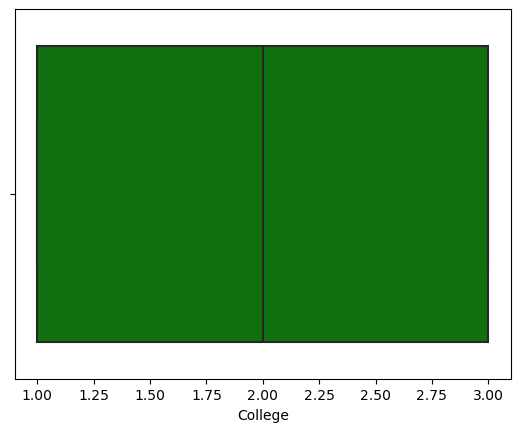

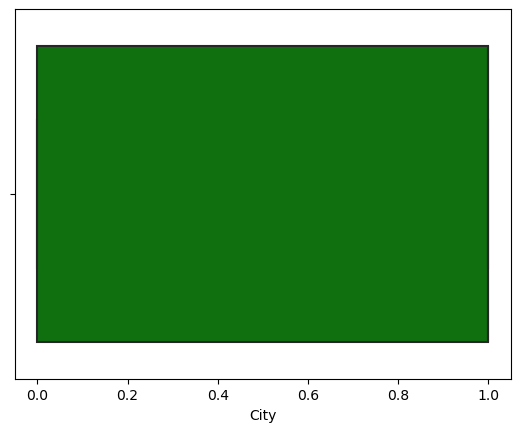

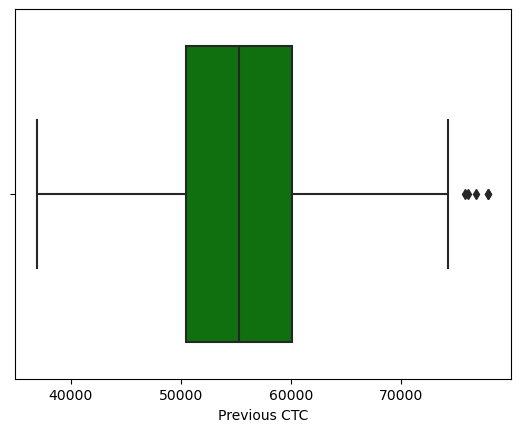

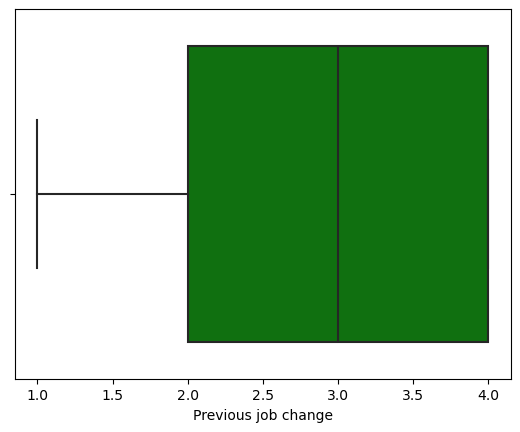

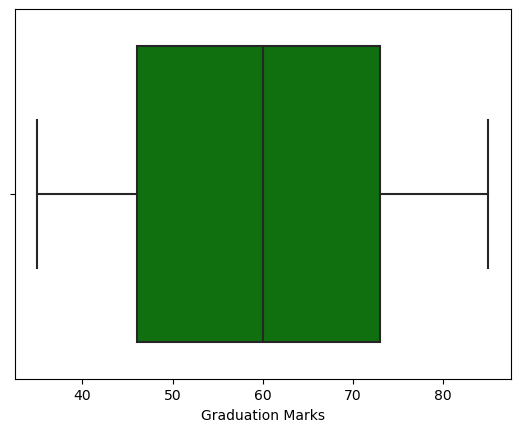

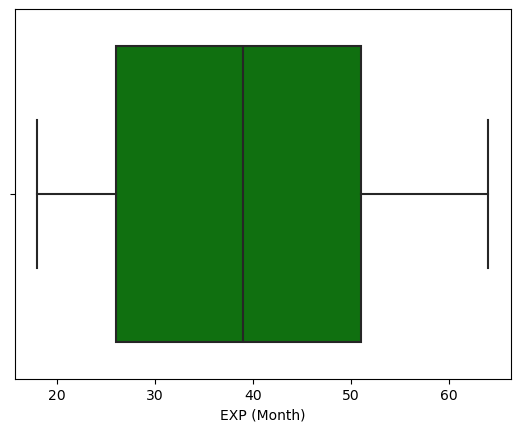

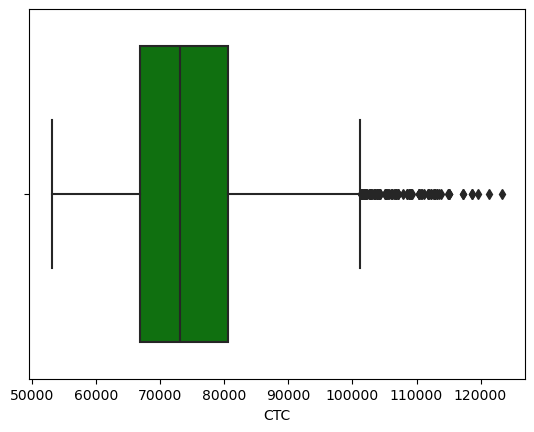

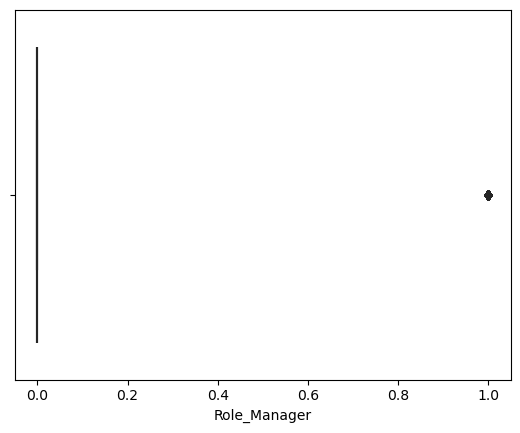

In [28]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
            sns.boxplot(data=df, x=i, color = "Green")
            plt.show()

### Create jointplot to get variable relation between depanded and independent variable

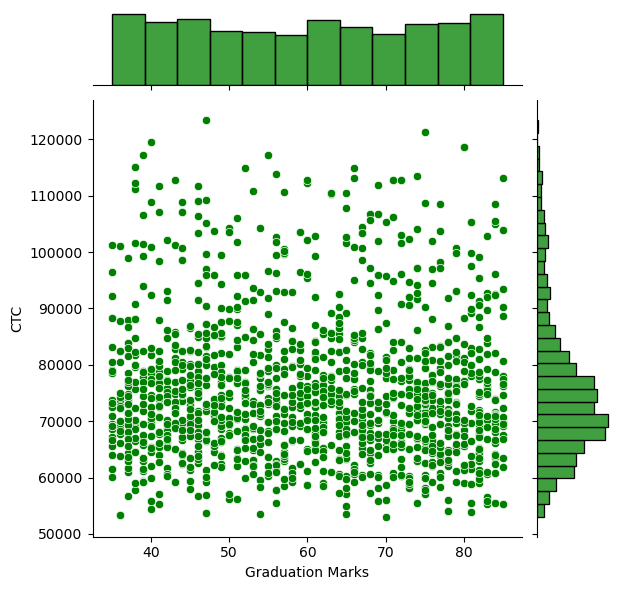

In [30]:
sns.jointplot(x = "Graduation Marks",y = "CTC", data = df, color = "Green")

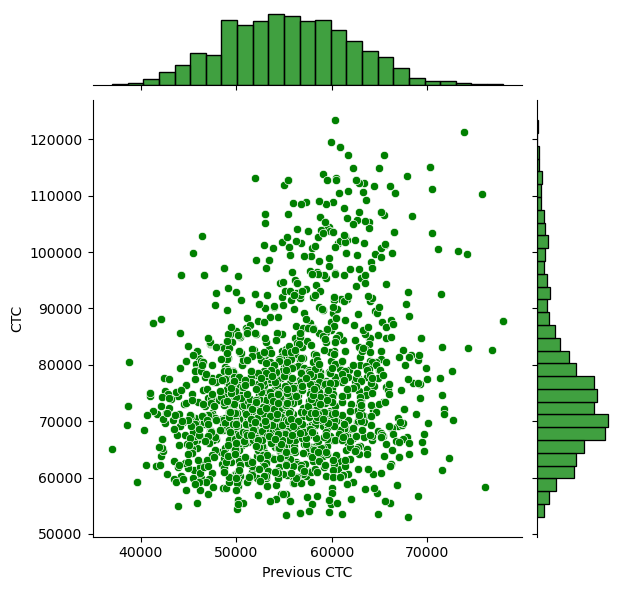

In [31]:
sns.jointplot(x = "Previous CTC",y = "CTC", data = df, color = "Green")

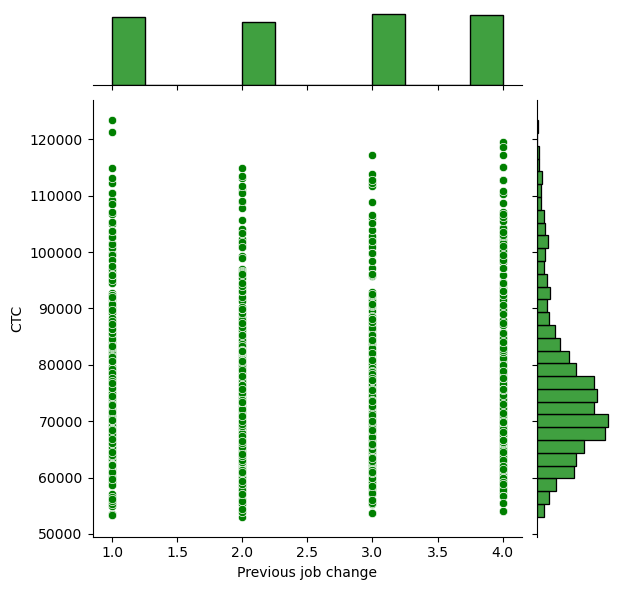

In [32]:
sns.jointplot(x = "Previous job change",y = "CTC", data = df, color = "Green")

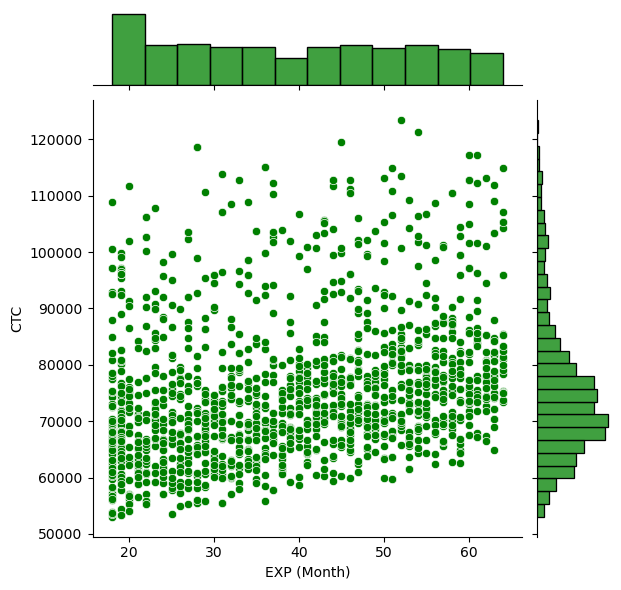

In [33]:
sns.jointplot(x = "EXP (Month)",y = "CTC", data = df, color = "Green")

##### no significant Outlier in the above data that can impact our model

### Create Corelation metrix

<Axes: >

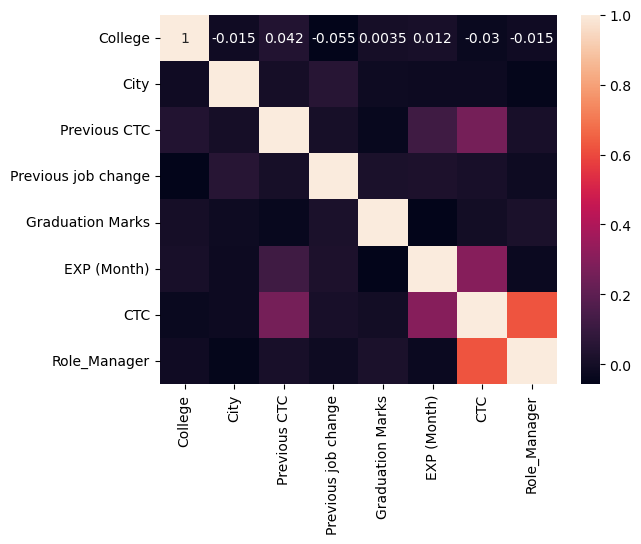

In [36]:
s = df.select_dtypes(include= "number").corr()
sns.heatmap(s, annot= True)

### Create multi Linear Regression model using Statsmodels

In [38]:
X_multi = df.loc[:, df.columns !="CTC"]

In [39]:
X_multi.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,0,55523.0,3,66,19,1
1,2,0,57081.0,1,84,18,0
2,3,0,60347.0,2,52,28,0
3,3,0,49010.0,2,81,33,0
4,1,0,57879.0,4,74,32,0


In [40]:
y_multi = df['CTC']

In [41]:
y_multi.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [42]:
X_multi_cons = sn.add_constant(X_multi)

In [43]:
X_multi_cons.head()

,const,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,1.0,2,0,55523.0,3,66,19,1
1,1.0,2,0,57081.0,1,84,18,0
2,1.0,3,0,60347.0,2,52,28,0
3,1.0,3,0,49010.0,2,81,33,0
4,1.0,1,0,57879.0,4,74,32,0


In [44]:
m1_multi_stats = sn.OLS(y_multi, X_multi_cons).fit()

In [45]:
m1_multi_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Fri, 28 Jun 2024   Prob (F-statistic):          4.70e-257
Time:                        14:11:24   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2192.660     17.523      0.000    3.41e+04    4.27e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                  380.8308    433.455      0.879      0.380    -469.377    1231.039
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Role_Manager         1.949e+04    534.694     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Create multi Linear Regression model using Using SkLearn

In [47]:
m1_multi_lr = LinearRegression()

In [48]:
m1_multi_lr.fit(X_multi, y_multi)

LinearRegression()

##### The model has been fitted with multiple regression

In [50]:
print(m1_multi_lr.intercept_, m1_multi_lr.coef_)

38421.10980689673 [-4.81514705e+02  3.80830787e+02  4.10090279e-01  1.26565295e+02
  6.23621203e+00  2.61344394e+02  1.94874279e+04]


In [51]:
y_pred = m1_multi_lr.predict(X_multi)

In [52]:
mse = mean_squared_error(y_multi,y_pred)
r2 = r2_score(y_multi,y_pred)

In [53]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  73736458.29764366 
R2 Score - 0.5343159981702308


##### Note : Since Our Dependent variable is continuous such that Classification methods are not applicable

## Decision Tree Regressor

In [56]:
X = df.loc[:,df.columns!="CTC"]

In [57]:
y = df["CTC"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [59]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


In [60]:
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [61]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [62]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [63]:
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

In [64]:
print("MSE - ",mse,"\nR2 Score -",r2)

MSE -  60424631.02613479 
R2 Score - 0.5927831611924909


In [65]:
dot_data = tree.export_graphviz(regtree, out_file=None,feature_names= X_train.columns, filled = True)

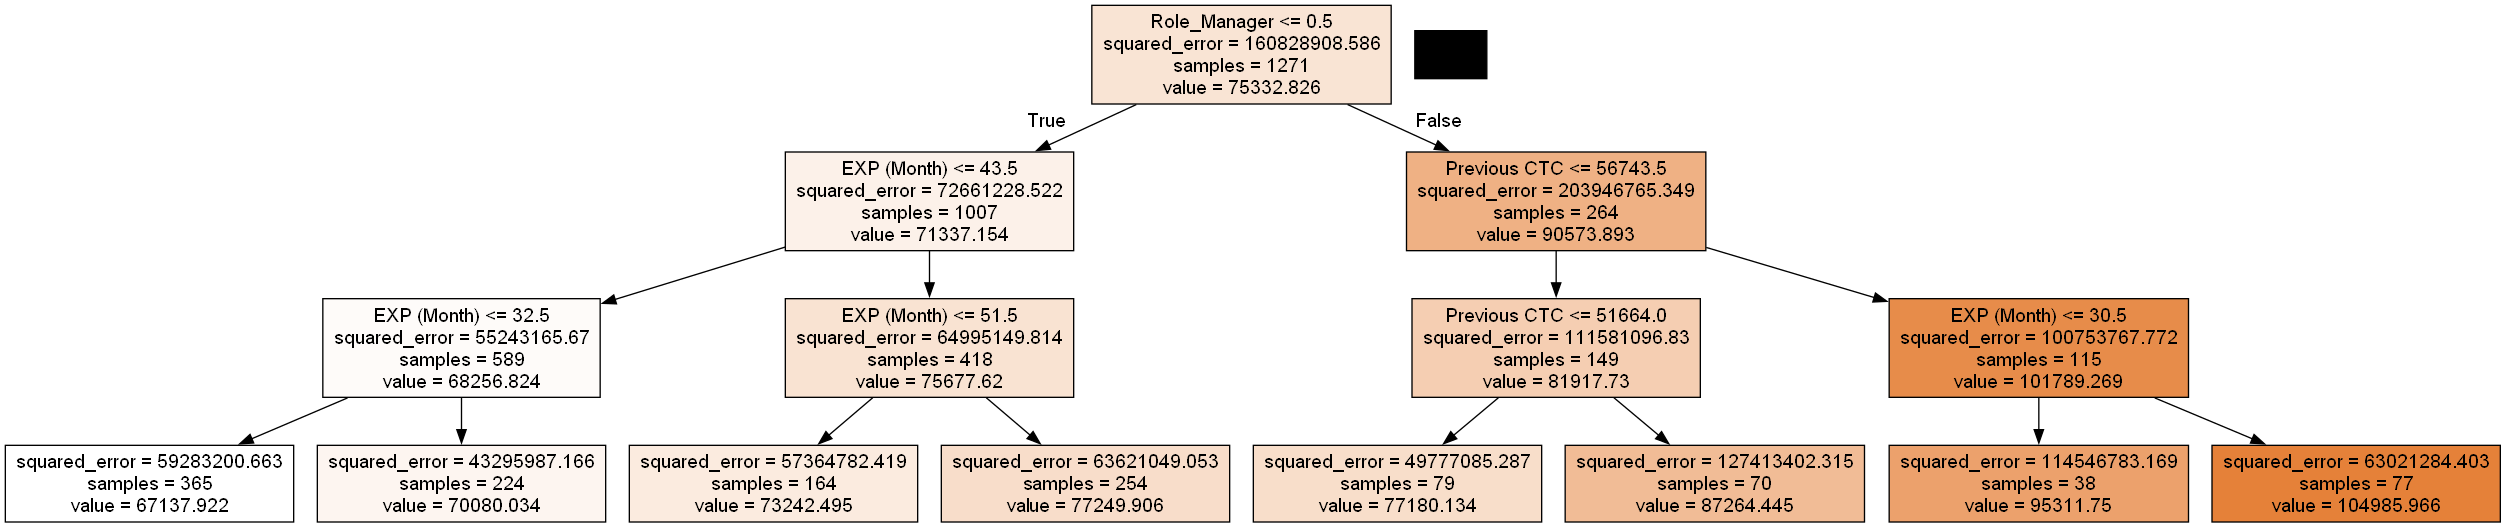

In [66]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Create Random Forest Regressor

In [68]:
rf = RandomForestRegressor(n_estimators=250, random_state=42)  

In [69]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [70]:
prediction_value = rf.predict(X_test)

In [71]:
MSE = mean_squared_error(y_test, prediction_value)
R2 = r2_score(y_test, prediction_value)

In [72]:
print("Mean Squared Error - ",MSE,"\nR2 Score -",R2)

Mean Squared Error -  50434757.980087616 
R2 Score - 0.6601074369524895


### Gradient Boosting Machines Regressor


In [74]:
model = GradientBoostingRegressor(n_estimators = 250, learning_rate = 0.1, max_depth = 4, random_state = 42)

In [75]:
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=250, random_state=42)

In [76]:
pred_gb = model.predict(X_test)

In [77]:
mse_gb = mean_squared_error(y_test, pred_gb)
r2_gb = r2_score(y_test,pred_gb)

In [78]:
print("MSE - ",mse_gb)

MSE -  54506047.158160515


In [79]:
print("R2 value - ",r2_gb)

R2 value -  0.6326699916456412


### XGBoost Regressor

In [81]:
xgb_reg = XGBRegressor(n_estimators = 500, max_depth = 5, learning_rate = 0.1, n_jobs=-1)

In [82]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

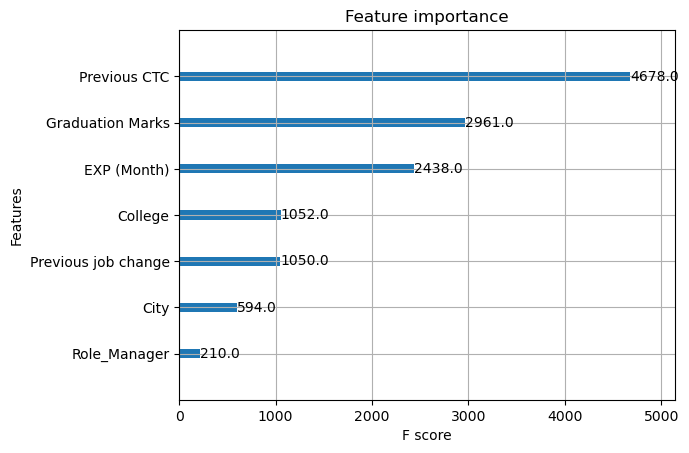

In [83]:
xgb.plot_importance(xgb_reg)

In [84]:
param_test1 = {
    'max_depth': range(3, 10, 2),
    'gamma': [0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'reg_alpha': [1e-2, 0.1, 1]
}

In [85]:
grid_search = GridSearchCV(xgb_reg, param_test1, n_jobs=-1, cv=5, scoring='r2')

In [86]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=500,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='r2')

In [87]:
best_params = grid_search.best_params_

In [88]:
print("Best Parameters:", best_params)

Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0.3, 'max_depth': 9, 'reg_alpha': 0.01, 'subsample': 0.9}


In [89]:
best_XGboost_model = grid_search.best_estimator_

In [90]:
print('Test R2_score = ',r2_score(y_test,best_XGboost_model.predict(X_test)))

Test R2_score =  0.6613049605576412


In [91]:
print('Test Mean Squared Error = ',mean_squared_error(y_test,best_XGboost_model.predict(X_test)))

Test Mean Squared Error =  50257064.144542225


### Ridge Regression

In [93]:
scaler = StandardScaler()

In [94]:
scaler.fit(X_train)

StandardScaler()

In [95]:
X_train_s = scaler.transform(X_train)

In [96]:
X_test_s = scaler.transform(X_test)

In [97]:
lm_r = Ridge(alpha = 0.5)

In [98]:
lm_r.fit(X_train_s,y_train)

Ridge(alpha=0.5)

In [99]:
y_pred = lm_r.predict(X_test_s)

In [100]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [101]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  68911963.65250452 
R2 Score - 0.5355848845406525


### Changing Hyper Parameters

In [103]:
param_range = np.logspace(-2,8,100)

In [104]:
train_scores, test_scores = validation_curve(
  Ridge(),
  X_train_s, 
  y_train,
  param_name ="alpha",
  param_range = param_range,
  scoring = "r2"
)

In [105]:
train_mean = np.mean(train_scores, axis = 1)

In [106]:
test_mean = np.mean(test_scores, axis = 1)

In [107]:
max(test_mean)

0.5258291929838951

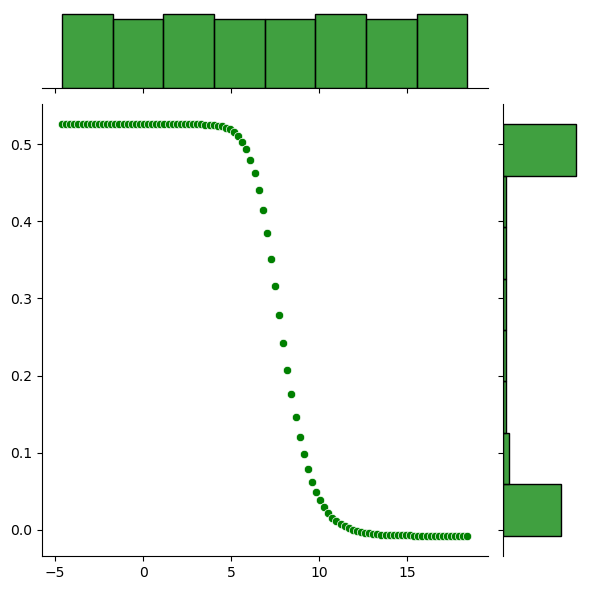

In [108]:
sns.jointplot(x=np.log(param_range),y = test_mean, color = "Green")

In [109]:
np.where(test_mean == max(test_mean))

(array([26], dtype=int64),)

In [110]:
param_range[30]

10.722672220103231

In [111]:
lm_r_best = Ridge(alpha = param_range[30])

In [112]:
lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=10.722672220103231)

* optimum value of alpha is 10.72267222010323

In [114]:
y_pred_best = lm_r.predict(X_test_s)

In [115]:
r2_score(y_test,y_pred_best)

0.5355848845406525

### Lasso Regression

In [117]:
lm_s = Lasso(alpha = 0.5)

In [118]:
lm_s.fit(X_train_s,y_train)

Lasso(alpha=0.5)

In [119]:
y_pred = lm_s.predict(X_test_s)

In [120]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [121]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  68908896.5345529 
R2 Score - 0.5356055546226256


### Changing Hyper Parameters

In [123]:
param_range = np.logspace(-2,8,100)

In [124]:
train_scores, test_scores = validation_curve(
  Lasso(),
  X_train_s, 
  y_train,
  param_name ="alpha",
  param_range = param_range,
  scoring = "r2"
)

In [125]:
train_mean = np.mean(train_scores, axis = 1)

In [126]:
test_mean = np.mean(test_scores, axis = 1)

In [127]:
max(test_mean)

0.5258340188547592

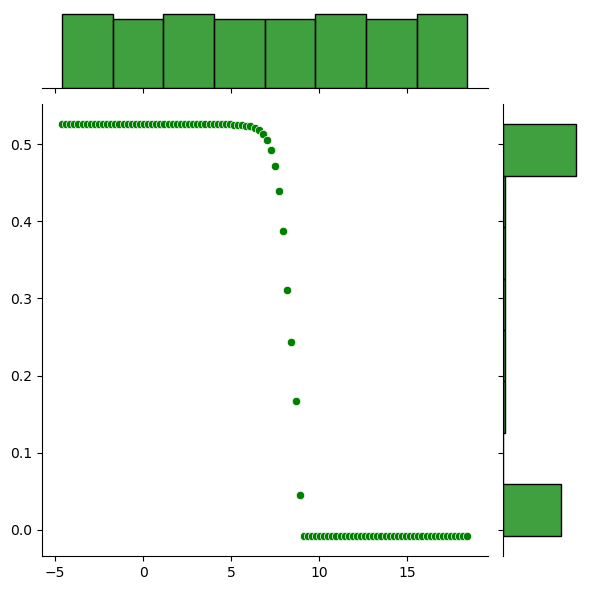

In [128]:
sns.jointplot(x=np.log(param_range),y = test_mean, color = "Green")

In [129]:
np.where(test_mean == max(test_mean))

(array([36], dtype=int64),)

In [130]:
param_range[36]

43.28761281083057

In [131]:
lm_s_best = Lasso(alpha = param_range[36])

In [132]:
lm_s_best.fit(X_train_s,y_train)

Lasso(alpha=43.28761281083057)

*  optimum value of alpha is 43.28761281083057

In [134]:
y_pred_best = lm_s.predict(X_test_s)

In [135]:
r2_score(y_test,y_pred_best)

0.5356055546226256

### Adaboost Regressor

In [137]:
param_grid_adaboost = {
    'n_estimators': [100, 250, 500],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [138]:
grid_search_adaboost = GridSearchCV(estimator=AdaBoostRegressor(),
                                param_grid=param_grid_adaboost,
                                scoring='r2',
                                n_jobs=-1,
                                cv=5)

In [139]:
grid_search_adaboost.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [100, 250, 500]},
             scoring='r2')

In [140]:
best_adaboost_model = grid_search_adaboost.best_estimator_

In [141]:
print('R2_score',r2_score(y_test,best_adaboost_model.predict(X_test)))

R2_score 0.6055981701670958


In [142]:
print('MSE',mean_squared_error(y_test,best_adaboost_model.predict(X_test)))

MSE 58523083.45959828


### plot important features

In [144]:
feature_importances = best_adaboost_model.feature_importances_

In [145]:
feature_names = X_train.columns

In [146]:
sorted_idx = feature_importances.argsort()[::-1]

In [147]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

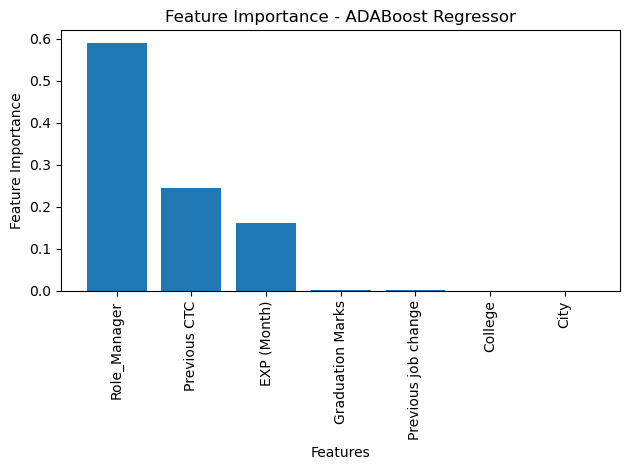

In [148]:
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx])
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance - ADABoost Regressor")
plt.tight_layout()
plt.show()

# Project Questions & their Answers :-

## 1. Your views about the problem statement?

Answer:- Its about the TECHWORKS consulting's apporach and
the problem statement is clear and provides a comprehensive overview of the task at hand.
It specifies the need to predict employee salaries based on various features such as 
* College,
* City,
* Previous CTC,
* Previous job change,
* Graduation Marks,
* EXP (Month),
Role using regression techniques.

## 2. What will be your approach to solving this task?

My approach to solving this task first understand the problem and then understand the data we have three 'csv' files
1st 'ML case Study.csv' which contain employee data
2nd 'Colleges.csv'
3rd 'cities.csv'
after understanding the data we have to

### Load data and important libraries
we have to import necessary libraries like numpy, pandas, seaborn, sklearn, statsmodels.api, matplotlib.pyplot and regression model libraries
  * then we have to load our data
    
### data preprocessing
  * we have to check null values or missing values and we have to treat miss values
  * create dummey veriables
  * we have to check outliers and treat outlier

### Model selection and training
  * we have perform test_train_split to check model performance by defolt raiton of train test data is (0.8:0.2)
  * train multiple regression models
       * multi Linear Regression model using Statsmodels       * 
multi Linear Regression model using Using SkLearn       * Decision Tree Regressor
       * Random Forest Regressor
       * Gradient Boosting Machines Regressor
       * XGBoost Regressor
       * Ridge Regression
       * Lasso Regression
       * Adaboost Regressor

### Model Evaluation
   * check parameters MSE(mean squared error) and R2_Squared value

### Predictive Analysis
   *  using trained model predict salariesgressor


## 3. What were the available ML model options you had to perform this task?

Available ML model options
   * multi Linear Regression model using Statsmodels
   * multi Linear Regression model using Using SkLearn
   * Decision Tree Regressor
   * Random Forest Regressor
   * Gradient Boosting Machines Regressor
   * XGBoost Regressor
   * Ridge Regression
   * Lasso Regression
   * Adaboost Regressor

## 4. Which model’s performance is best and what could be the possible reason for that?

Random Forest Regressor is the best performance model for this task to predict new employees salary.
* Reason:- Random Forest Regressor give maximum accuracy and maximum R2_ Score as compared to other models

#### R2_Score of all models

   * multi Linear Regression model using Statsmodels -------------        0.534
   * multi Linear Regression model using Using SkLearn -----------       0.5343159981702308
   * Decision Tree Regressor -----------------------------------------        0.5927831611924912
   * Random Forest Regressor ---------------------------------------        0.6601074369524895
   * Gradient Boosting Machines Regressor -------------------------        0.6326699916456412
   * XGBoost Regressor ----------------------------------------------        0.6613049605576412
   * Ridge Regression ------------------------------------------------         0.5355848845406525
   * Lasso Regression ------------------------------------------------         0.5356055546226256
   * Adaboost Regressor ---------------------------------------------         0.6065195139800307

as say Random Forest Regressor best model r2_score of Random Forest Regressor is "0.6601074369524895".

(Note:- Random Forest Regressor and XGBoost Regressor both are give close or similar r2_score values so both are best Model
Random Forest Regressor r2_score  "0.6601074369524895", 
XGBoost Regressor r2_score "0.6613049605576412")

## 5. What steps can you take to improve this selected model’s performance even further?

To improve the model's performance
* Gathering More Data: Acquiring more data, if feasible, will enhances the model's ability to generalize.
* hyperparameter tuning :- Fine-tuning model hyperparameters ensures optimal performance.
* adding more relevant features, performing advanced feature engineering, and using ensemble techniques can be beneficial.
* Early stopping: Implement early stopping to prevent overfitting. Stop the training of the model when its performance on the validation set starts to decline.